In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import datetime as dt
df = pd.read_csv("../five_min_frame.csv")

In [3]:
df.columns

Index([u'Unnamed: 0', u'Timestamp', u'Station', u'District', u'Freeway #',
       u'Direction', u'Lane Type', u'Station Length', u'Samples',
       u'% Observed', u'Total Flow', u'Avg Occupancy', u'Avg Speed'],
      dtype='object')

In [4]:
idx1 = df['Freeway #'] == 5
idx2 = df['Direction'] == 'S'
idx3 = df['Lane Type'] == 'ML'

In [194]:
df.shape

(29376, 3)

In [8]:
df = df.ix[idx1 & idx2 & idx3,:]

In [9]:
df.shape

(10773178, 13)

In [10]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [11]:
df['Time'],df['Date']= df['Timestamp'].apply(lambda x:x.time()), df['Timestamp'].apply(lambda x:x.date())

In [12]:
#df2 = df.copy()

In [13]:
df = df[['Time','Station','Total Flow']]

In [14]:
df = df.groupby(['Time','Station']).mean()

In [15]:
df = df.reset_index()

In [16]:
df.shape

(29664, 3)

In [30]:
df.head()

,Station,Time,Total Flow
0,1108417,00:00:00,140.400000
103,1108417,00:05:00,149.246575
206,1108417,00:10:00,151.482192
309,1108417,00:15:00,139.030137
412,1108417,00:20:00,125.994521


In [54]:
meta = pd.read_csv('I5Smeta')

In [60]:
meta = meta.rename(columns={'ID':'Station'})

In [76]:
meta.sort_values(['Latitude'],ascending=False)

,Unnamed: 0,Station,Fwy,Dir,District,County,City,State_PM,Abs_PM,Latitude,Longitude,Length,Type,Lanes,Name,User_ID_1,User_ID_2,User_ID_3,User_ID_4,file_date
0,0,1121734,5,S,11,73,NaN,R71.05,70.878,33.383349,-117.578043,2.621,ML,4,5 SB Basilone Rd,3109,NaN,NaN,NaN,meta_2015_12
1,1,1121728,5,S,11,73,NaN,R68.451,68.279,33.362845,-117.540736,2.714,ML,4,5 SB Nuclear Plant,4107,NaN,NaN,NaN,meta_2015_12
2,2,1121722,5,S,11,73,NaN,R65.621,65.449,33.336536,-117.503249,1.415,ML,4,5 SB Truck Scales,3106,NaN,NaN,NaN,meta_2015_12
3,3,1121715,5,S,11,73,NaN,R65.62,65.448,33.336526,-117.503236,1.514,ML,4,5 NB Track Scale,3105,NaN,NaN,NaN,meta_2015_12
4,4,1121712,5,S,11,73,NaN,R62.591,62.419,33.303834,-117.470867,2.509,ML,4,5 SB Las Pulgas Rd,3104,NaN,NaN,NaN,meta_2015_12
5,5,1121702,5,S,11,73,NaN,R60.601,60.429,33.281440,-117.449446,2.045,ML,4,5 SB N/O Rest Area,3102,NaN,NaN,NaN,meta_2015_12
6,6,1119997,5,S,11,73,NaN,R58.501,58.329,33.257953,-117.426547,1.785,ML,4,1M S/O ALISO CREEK,23607,NaN,NaN,NaN,meta_2015_12
7,7,1119978,5,S,11,73,NaN,R57,56.858,33.240152,-117.413376,1.235,ML,4,.5 N/O STA MARGRITA,13605,NaN,NaN,NaN,meta_2015_12
8,8,1119966,5,S,11,73,NaN,R56,55.858,33.230196,-117.400904,1.000,ML,4,S/O SANTA MARGARITA,13603,NaN,NaN,NaN,meta_2015_12
9,9,1119954,5,S,11,73,NaN,R55,54.858,33.218567,-117.391109,0.783,ML,4,S5 N/O CAMP DEL MAR,13601,NaN,NaN,NaN,meta_2015_12


In [78]:
df = df.merge(meta)

In [39]:
#df.to_csv('I5SmeanVectors.csv')

In [79]:
df=df.sort_values(['Latitude','Time'],ascending=[False,True])
df = df[['Station','Time','Total Flow']]

data = df.as_matrix()

rows, row_pos = np.unique(data[:, 0], return_inverse=True) #Time
cols, col_pos = np.unique(data[:, 1], return_inverse=True)

pivot_table = np.zeros((len(rows), len(cols)), dtype=data.dtype)
pivot_table[row_pos, col_pos] = data[:, 2]

a = pivot_table; # example of what real input will look like

# create 2D flattened version of 3D input array
d1,d2 = a.shape
b = np.zeros([d1,d2])
for i in range(len(a)):
    b[i] = a[i].flatten()

In [80]:
b.shape

(102, 288)

In [198]:
import analyzeWiggles as aw
from scipy.interpolate import interp1d, Akima1DInterpolator

In [199]:
#first,second = aw.interpolate(b,'akima',6)

In [200]:
list_of_b_diffs = []
for i in range(102):
    diff = aw.smooth_vector(b[i],'akima',6)
    new_vec = diff['meanVector'] - diff['smoothedVector']
    #list_of_b_diffs.append(diff['diffVector'])
    list_of_b_diffs.append(new_vec)

TypeError: 'int' object has no attribute '__getitem__'

In [201]:
diff

{'diffVector': array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.15675812e-02,  -3.27770612e-02,  -2.15830439e-02,
         -4.67734786e-03,  -6.91930342e-03,  -4.84207978e-04,
         -2.67237849e-03,  -3.11859377e-03,  -3.42773052e-02,
          7.60190490e-04,   1.33631761e-02,   2.25596106e-02,
         -1.51562037e-02,  -1.23806555e-02,  -2.89790184e-02,
         -2.32202731e-02,  -2.39245736e-03,  -1.24949201e-02,
          5.38293381e-03,   2.53515089e-02,   1.47117160e-02,
          7.53272720e-03,  -4.41642855e-03,  -1.15037392e-02,
          2.71800190e-03,   5.96124452e-04,  -2.16135280e-02,
         -1.52058928e-02,  -7.73308742e-03,  -1.15876694e-02,
          5.85710269e-03,   1.91369221e-02,   5.06526250e-03,
         -5.27892111e-03,   6.48491387e-03,   2.14224897e-03,
         -9.16244052e-04,  -8.66218054e-03,  -8.81410365e-04,
          7.51381987e-03,  -5.03150584e-03,   7.95871740e-03,
         -7.82625128e-03,  -6.07011121e-03,   2.12758961

In [202]:
new_b = np.array(list_of_b_diffs)

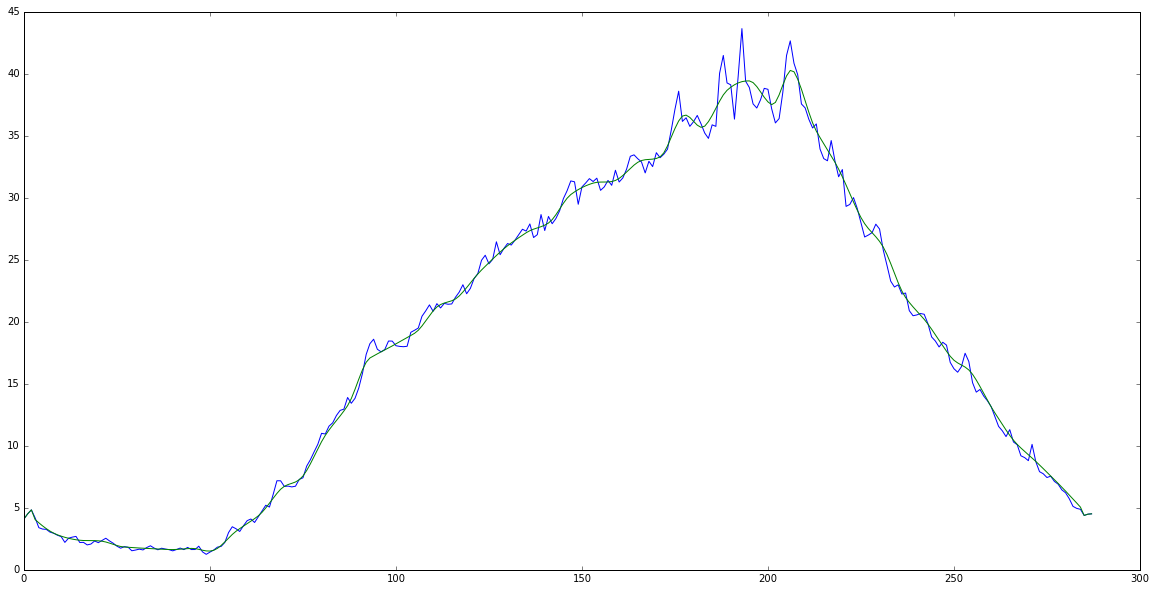

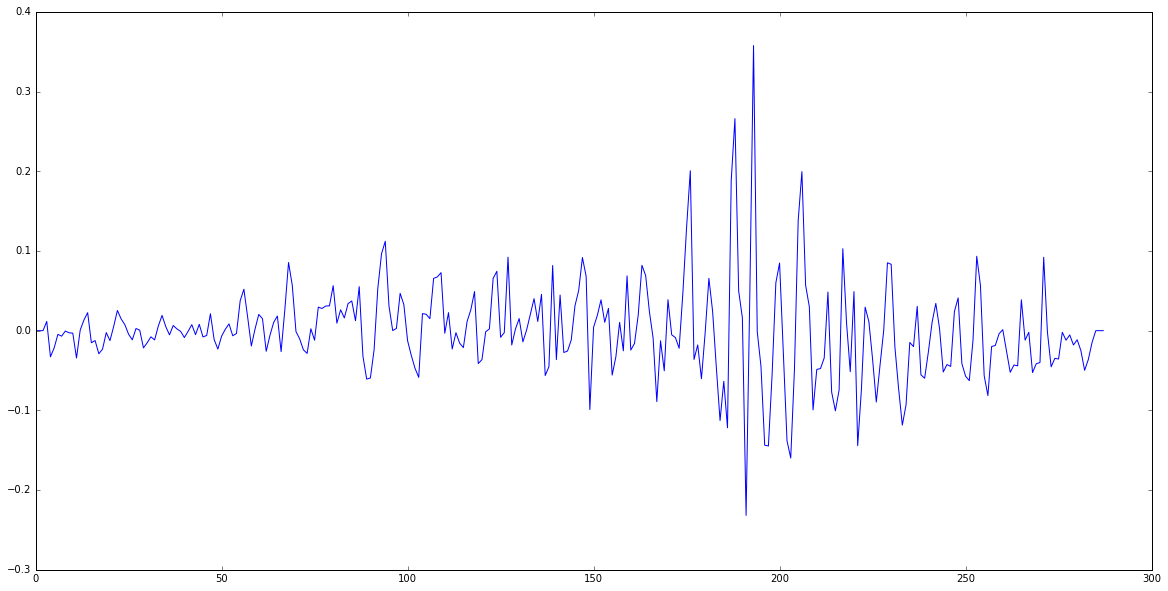

In [145]:
plt.figure(figsize = (20,10))
plt.plot(diff['meanVector'])
plt.plot(diff['smoothedVector'])
plt.show()
plt.figure(figsize = (20,10))
plt.plot(diff['diffVector'])
plt.show()

In [157]:
curve_fit?

In [156]:
curve_fit(mysine, np.arange(288), diff['diffVector'], p0=[6,0],maxfev=1000)

(array([ 5.99352297,  0.55479191]),
 array([[  4.85048727e-07,  -6.95534308e-05],
        [ -6.95534308e-05,   1.34006137e-02]]))

In [178]:
def mysine(x, a, b):
    return 1. * np.sin(a * x + b)

In [182]:
a = np.pi*5/60
b = 0

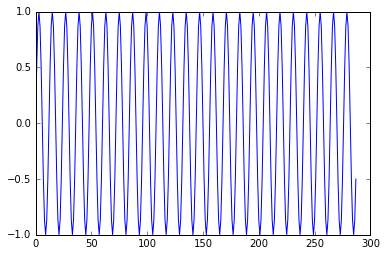

In [186]:
plt.plot(mysine(x, a*2, b))

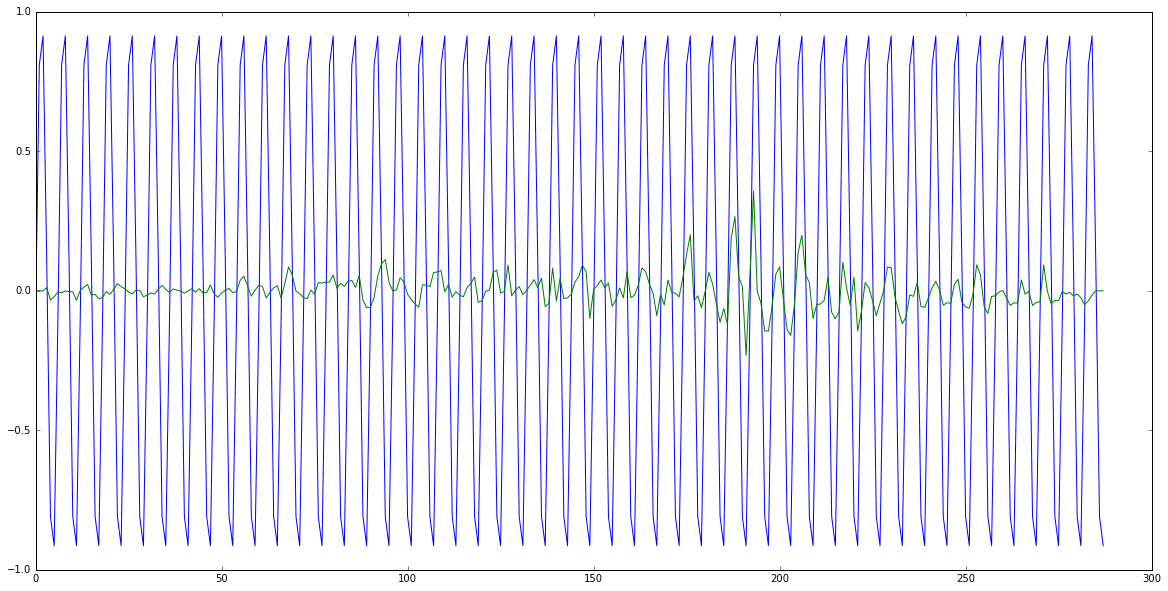

In [193]:
plt.figure(figsize = (20,10))
plt.plot(mysine(x, a*2*2, b+np.pi/30*-1))
plt.plot(diff['diffVector'])

In [146]:
diff['diffVector']

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         1.15675812e-02,  -3.27770612e-02,  -2.15830439e-02,
        -4.67734786e-03,  -6.91930342e-03,  -4.84207978e-04,
        -2.67237849e-03,  -3.11859377e-03,  -3.42773052e-02,
         7.60190490e-04,   1.33631761e-02,   2.25596106e-02,
        -1.51562037e-02,  -1.23806555e-02,  -2.89790184e-02,
        -2.32202731e-02,  -2.39245736e-03,  -1.24949201e-02,
         5.38293381e-03,   2.53515089e-02,   1.47117160e-02,
         7.53272720e-03,  -4.41642855e-03,  -1.15037392e-02,
         2.71800190e-03,   5.96124452e-04,  -2.16135280e-02,
        -1.52058928e-02,  -7.73308742e-03,  -1.15876694e-02,
         5.85710269e-03,   1.91369221e-02,   5.06526250e-03,
        -5.27892111e-03,   6.48491387e-03,   2.14224897e-03,
        -9.16244052e-04,  -8.66218054e-03,  -8.81410365e-04,
         7.51381987e-03,  -5.03150584e-03,   7.95871740e-03,
        -7.82625128e-03,  -6.07011121e-03,   2.12758961e-02,
        -1.10437365e-02,

In [137]:
df_b = pd.DataFrame(new_b)
big_df = pd.concat([df_b.reset_index(),meta.reset_index()],axis=1)
output = pd.melt(big_df, id_vars=list(meta.columns), value_vars=list(df_b.columns), var_name='Time',value_name='Flow')
output.to_csv('I5S Wiggle Output.csv')